# [Spotify Song & Genre Analysis, Popularity Prediction and Building a Simple Recommendation System - 48]

Barış Akalın 27043

#PART 1

##Installing Required Libraries

In [ ]:
from google.colab import drive
drive.mount("./drive", force_remount=True)

path_prefix = "./drive/My Drive"

Mounted at ./drive


In [ ]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
import seaborn as sns
import re
sns.set_style("darkgrid")
from scipy import stats
from scipy import special
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_text
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

##Visualizations Descriptive Statistics

Firstly, first five elements of dataframe are displayed.

###Basic Informations about the Data

In [ ]:
filename = "data.csv"
df = pd.read_csv(join(path_prefix, filename))
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


Basic informations about the dataframe are displayed via describe method.

In [ ]:
df.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,174389.000000,174389.000000,1.743890e+05,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000
mean,0.499228,0.536758,2.328100e+05,0.482721,0.068135,0.197252,5.205305,0.211123,-11.750865,0.702384,25.693381,0.105729,117.006500,0.524533,1977.061764
std,0.379936,0.176025,1.483958e+05,0.272685,0.251978,0.334574,3.518292,0.180493,5.691591,0.457211,21.872740,0.182260,30.254178,0.264477,26.907950
min,0.000000,0.000000,4.937000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1920.000000
25%,0.087700,0.414000,1.661330e+05,0.249000,0.000000,0.000000,2.000000,0.099200,-14.908000,0.000000,1.000000,0.035200,93.931000,0.311000,1955.000000
50%,0.517000,0.548000,2.057870e+05,0.465000,0.000000,0.000524,5.000000,0.138000,-10.836000,1.000000,25.000000,0.045500,115.816000,0.536000,1977.000000
75%,0.895000,0.669000,2.657200e+05,0.711000,0.000000,0.252000,8.000000,0.270000,-7.499000,1.000000,42.000000,0.076300,135.011000,0.743000,1999.000000
max,0.996000,0.988000,5.338302e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.971000,243.507000,1.000000,2021.000000


Number of rows and columns are displayed. 

In [ ]:
df.shape

(174389, 19)

Data types of column are displayed.

In [ ]:
df.dtypes

acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
valence             float64
year                  int64
dtype: object

Checking for NaN values. Since no NaN values exist in this dataframe, no operation is needed to fix them. 

In [ ]:
df.isna().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

###Visualization of Data according to the Features

Text(0, 0.5, '# of songs')

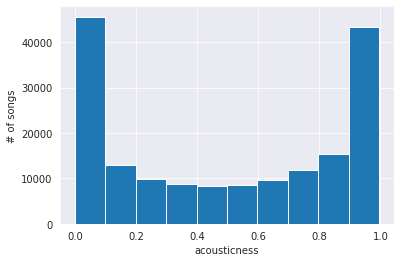

In [ ]:
#distribution plots of features in dataframe

ax = df["acousticness"].plot.hist()
ax.set_xlabel('acousticness')
ax.set_ylabel('# of songs')

Text(0, 0.5, '# of songs')

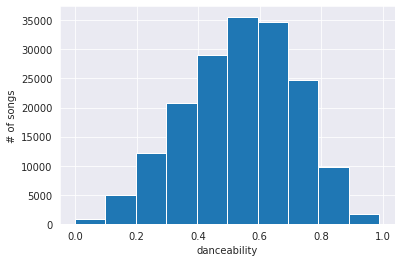

In [ ]:
ax = df["danceability"].plot.hist()
ax.set_xlabel('danceability')
ax.set_ylabel('# of songs')

In below, log transformation is used to decrease skewness of data.

Text(0, 0.5, '# of songs')

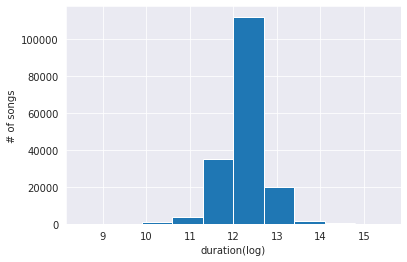

In [ ]:
df['duration_ms'] = np.log(df.duration_ms)
ax = df["duration_ms"].plot.hist()
ax.set_xlabel('duration(log)')
ax.set_ylabel('# of songs')

Text(0, 0.5, '# of songs')

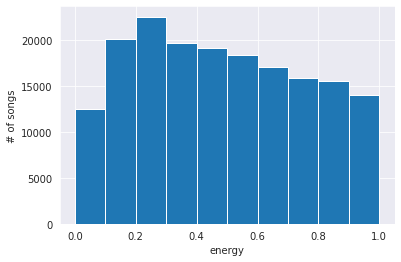

In [ ]:
ax = df["energy"].plot.hist()
ax.set_xlabel('energy')
ax.set_ylabel('# of songs')

Text(0, 0.5, '# of songs')

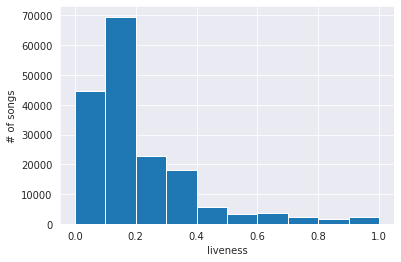

In [ ]:
ax = df["liveness"].plot.hist()
ax.set_xlabel('liveness')
ax.set_ylabel('# of songs')

Text(0, 0.5, '# of songs')

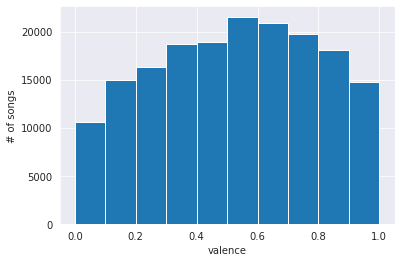

In [ ]:
ax = df["valence"].plot.hist()
ax.set_xlabel('valence')
ax.set_ylabel('# of songs')

Since all features will not be used, plotting for some features is skipped.

##Visualizations of Aggregated Forms Based on Features

Here are the phases of merging two dataframes according to artists

In [ ]:
filename_wgenres = "data_w_genres[1].csv"
df_wgenres = pd.read_csv(join(path_prefix, filename_wgenres))
df_wgenres.head()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
0,"""Cats"" 1981 Original London Cast",0.598500,0.470100,267072.000000,0.376203,0.010261,0.283050,-14.434300,0.209150,114.128800,0.358320,38.200000,5,1,10,['show tunes']
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,31.538462,5,1,26,[]
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.571429,0,1,7,[]
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.407407,0,1,27,[]
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,42.000000,5,1,7,[]


In [ ]:
df['artists'] = df['artists'].apply(lambda x: re.findall(r'[\']([\w\s-]+)[\']', x))

In [ ]:
df = df.explode('artists')

In [ ]:
merged = pd.merge(df, df_wgenres, on="artists")

In [ ]:
merged = merged.set_index("genres")
merged.head()

,acousticness_x,artists,danceability_x,duration_ms_x,energy_x,explicit,id,instrumentalness_x,key_x,liveness_x,loudness_x,mode_x,name,popularity_x,release_date,speechiness_x,tempo_x,valence_x,year,acousticness_y,danceability_y,duration_ms_y,energy_y,instrumentalness_y,liveness_y,loudness_y,speechiness_y,tempo_y,valence_y,popularity_y,key_y,mode_y,count
genres,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"['harlem renaissance', 'traditional blues']",0.991,Mamie Smith,0.598,168333,0.2240,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.379,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.634,1920,0.983,0.62725,177981.75,0.184556,0.000288,0.372625,-12.800313,0.121438,113.009938,0.641062,3.1875,0,1,16
"['harlem renaissance', 'traditional blues']",0.993,Mamie Smith,0.647,163827,0.1860,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.519,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.689,1920,0.983,0.62725,177981.75,0.184556,0.000288,0.372625,-12.800313,0.121438,113.009938,0.641062,3.1875,0,1,16
"['harlem renaissance', 'traditional blues']",0.992,Mamie Smith,0.782,195200,0.0573,0,5DlCyqLyX2AOVDTjjkDZ8x,0.000002,5,0.176,-12.453,1,Don't You Advertise Your Man,5,1920,0.0592,85.652,0.487,1920,0.983,0.62725,177981.75,0.184556,0.000288,0.372625,-12.800313,0.121438,113.009938,0.641062,3.1875,0,1,16
"['harlem renaissance', 'traditional blues']",0.995,Mamie Smith,0.482,198000,0.2290,0,0lqEx4vktZP1y9hnwfF27Y,0.000061,7,0.549,-12.619,1,Kansas City Man Blues - 78rpm Version,4,1920,0.0812,77.232,0.461,1920,0.983,0.62725,177981.75,0.184556,0.000288,0.372625,-12.800313,0.121438,113.009938,0.641062,3.1875,0,1,16
"['harlem renaissance', 'traditional blues']",0.992,Mamie Smith,0.574,189800,0.1380,0,4HYmmG8uHL2hP4zSFWavKF,0.000492,3,0.233,-14.171,1,Miss Jenny's Ball (aka There'll Be No Freebies...,1,1920,0.1090,158.422,0.764,1920,0.983,0.62725,177981.75,0.184556,0.000288,0.372625,-12.800313,0.121438,113.009938,0.641062,3.1875,0,1,16


After merging the dataframes, the artists belonging to a genre can be found. Let's take pop and rock genres as examples.

In [ ]:
popdf = merged.loc["[\'pop\']"]
popdf.head()



,acousticness_x,artists,danceability_x,duration_ms_x,energy_x,explicit,id,instrumentalness_x,key_x,liveness_x,loudness_x,mode_x,name,popularity_x,release_date,speechiness_x,tempo_x,valence_x,year,acousticness_y,danceability_y,duration_ms_y,energy_y,instrumentalness_y,liveness_y,loudness_y,speechiness_y,tempo_y,valence_y,popularity_y,key_y,mode_y,count
genres,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
['pop'],0.0151,Bruno Mars,0.637,220733,0.843,0,7BqBn9nzAq8spo5e7cZ0dJ,0.0,5,0.0876,-5.413,1,Just the Way You Are,80,2010-10-05,0.0432,109.012,0.434,2010,0.248747,0.67319,222818.416667,0.654833,0.000011,0.133858,-5.87244,0.079005,116.988238,0.607345,66.595238,0,1,84
['pop'],0.5120,Bruno Mars,0.523,217867,0.606,0,161DnLWsx1i3u1JT05lzqU,0.0,1,0.1060,-4.754,0,Talking to the Moon,77,2010-10-05,0.0301,145.837,0.065,2010,0.248747,0.67319,222818.416667,0.654833,0.000011,0.133858,-5.87244,0.079005,116.988238,0.607345,66.595238,0,1,84
['pop'],0.1460,Bruno Mars,0.706,223253,0.558,0,2tJulUYLDKOg9XrtVkMgcJ,0.0,2,0.1180,-7.237,0,Grenade,75,2010-10-05,0.0593,110.443,0.227,2010,0.248747,0.67319,222818.416667,0.654833,0.000011,0.133858,-5.87244,0.079005,116.988238,0.607345,66.595238,0,1,84
['pop'],0.3320,Bruno Mars,0.620,230120,0.832,0,22PMfvdz35fFKYnJyMn077,0.0,10,0.1040,-4.848,1,Marry You,72,2010-10-05,0.0360,144.926,0.481,2010,0.248747,0.67319,222818.416667,0.654833,0.000011,0.133858,-5.87244,0.079005,116.988238,0.607345,66.595238,0,1,84
['pop'],0.8400,Bruno Mars,0.577,197373,0.397,0,7l1qvxWjxcKpB9PCtBuTbU,0.0,0,0.0772,-5.980,1,Count on Me,73,2010-10-05,0.0280,89.044,0.509,2010,0.248747,0.67319,222818.416667,0.654833,0.000011,0.133858,-5.87244,0.079005,116.988238,0.607345,66.595238,0,1,84


In [ ]:
rockdf = merged.loc["[\'rock\']"]
rockdf.head()

,acousticness_x,artists,danceability_x,duration_ms_x,energy_x,explicit,id,instrumentalness_x,key_x,liveness_x,loudness_x,mode_x,name,popularity_x,release_date,speechiness_x,tempo_x,valence_x,year,acousticness_y,danceability_y,duration_ms_y,energy_y,instrumentalness_y,liveness_y,loudness_y,speechiness_y,tempo_y,valence_y,popularity_y,key_y,mode_y,count
genres,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
['rock'],0.0564,Jon Bon Jovi,0.550,335240,0.618,0,1sUTfgduT0WIQO8kXKXxLC,0.000026,7,0.0937,-9.822,1,"Blaze Of Glory - From ""Young Guns II"" Soundtrack",65,1990-01-01,0.0307,78.610,0.429,1990,0.202775,0.541375,279171.5,0.593125,0.000008,0.1571,-9.639125,0.031175,111.52175,0.46675,50.5,3,1,16
['rock'],0.2690,Jon Bon Jovi,0.430,172933,0.501,0,5tbSC9aFC7fzlI3BMEs2Wr,0.000000,9,0.2180,-9.398,1,Please Come Home For Christmas,56,1992-10-20,0.0277,178.351,0.342,1992,0.202775,0.541375,279171.5,0.593125,0.000008,0.1571,-9.639125,0.031175,111.52175,0.46675,50.5,3,1,16
['rock'],0.3670,Jon Bon Jovi,0.577,319427,0.677,0,6FJ9Xp3fCxSTAdcRVaDQdl,0.000000,3,0.4930,-10.327,1,Miracle,54,1990-01-01,0.0245,92.007,0.683,1990,0.202775,0.541375,279171.5,0.593125,0.000008,0.1571,-9.639125,0.031175,111.52175,0.46675,50.5,3,1,16
['rock'],0.1260,Jon Bon Jovi,0.518,341667,0.507,0,1wmaAfrbe1JLiyt7SpZeQU,0.000000,3,0.0457,-9.693,0,Santa Fe,53,1990-01-01,0.0295,140.106,0.299,1990,0.202775,0.541375,279171.5,0.593125,0.000008,0.1571,-9.639125,0.031175,111.52175,0.46675,50.5,3,1,16
['rock'],0.0211,Jon Bon Jovi,0.541,340000,0.704,0,0XwjdpwvEwukcg3XU4Ibzt,0.000042,7,0.1430,-6.167,1,Blaze Of Glory,51,1994-10-18,0.0324,78.797,0.416,1994,0.202775,0.541375,279171.5,0.593125,0.000008,0.1571,-9.639125,0.031175,111.52175,0.46675,50.5,3,1,16


It may be surprising that only one artist has appeared for both genres, but this is due to the fact that many of the artists in the dataframe are shown with multiple genres.

Now, let's check the danceability of songs of the artists on the same graph.

Text(0, 0.5, 'danceability')

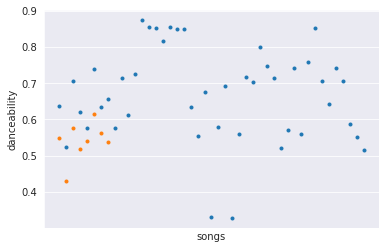

In [ ]:
ax = popdf["danceability_x"].plot(style='.')
x = []
plt.xticks(x)
ax.set_xlabel('songs')
ax.set_ylabel('danceability')

ax2 = rockdf["danceability_x"].plot(style='.')
y = []
plt.xticks(y)
ax2.set_xlabel('songs')
ax2.set_ylabel('danceability')

Blue dots represents pop songs and orange dots represents rock songs. It may be said that pop songs have more danceability than rock songs.

##Analysis of the Most Popular Artists and Songs

In [ ]:
merged = merged.sort_values(by=['popularity_x'],ascending=False)
merged.head()

,acousticness_x,artists,danceability_x,duration_ms_x,energy_x,explicit,id,instrumentalness_x,key_x,liveness_x,loudness_x,mode_x,name,popularity_x,release_date,speechiness_x,tempo_x,valence_x,year,acousticness_y,danceability_y,duration_ms_y,energy_y,instrumentalness_y,liveness_y,loudness_y,speechiness_y,tempo_y,valence_y,popularity_y,key_y,mode_y,count
genres,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"['pop', 'post-teen pop']",0.721,Olivia Rodrigo,0.585,12.396751,0.436,1,7lPN2DXiMsVn7XUKtOW1CS,0.000013,10,0.1050,-8.761,1,drivers license,100,2021-01-08,0.0601,143.874,0.132,2021,0.353225,0.457750,202002.750000,0.442375,3.275000e-06,0.102000,-7.145625,0.041900,102.087875,0.170625,82.250000,0,1,8
"['melodic rap', 'pop rap']",0.221,iann dior,0.700,11.853148,0.722,1,3tjFYV6RSFtuktYl3ZtYcq,0.000000,7,0.2720,-3.558,0,Mood (feat. iann dior),96,2020-07-24,0.0369,90.989,0.756,2020,0.157826,0.712682,153083.863636,0.620455,4.409091e-07,0.176645,-5.777545,0.052691,104.324909,0.524864,75.545455,7,1,22
['cali rap'],0.221,24kGoldn,0.700,11.853148,0.722,1,3tjFYV6RSFtuktYl3ZtYcq,0.000000,7,0.2720,-3.558,0,Mood (feat. iann dior),96,2020-07-24,0.0369,90.989,0.756,2020,0.141665,0.714500,157811.416667,0.684000,2.153333e-06,0.161500,-4.680167,0.094483,129.348833,0.579417,75.666667,9,0,12
"['dance pop', 'pop', 'post-teen pop']",0.468,Ariana Grande,0.737,12.057138,0.802,1,35mvY5S1H3J2QZyna3TFe0,0.000000,0,0.0931,-4.771,1,positions,96,2020-10-30,0.0878,144.015,0.682,2020,0.244536,0.644189,200930.109756,0.593140,7.500510e-04,0.187554,-5.924012,0.090332,118.227683,0.472040,70.420732,0,1,164
"['latin', 'reggaeton', 'trap latino']",0.401,Bad Bunny,0.731,12.231204,0.573,1,47EiUVwUp4C9fGccaPuUCS,0.000052,4,0.1130,-10.059,0,DÁKITI,95,2020-10-30,0.0544,109.928,0.145,2020,0.205138,0.741034,227945.130682,0.666545,1.701343e-04,0.161136,-5.730733,0.117114,121.704807,0.478594,54.511364,10,0,176


In above, the top 5 songs and artists with the highest popularity and their related datas and genres of this song can be seen.

#PART 2 

##Statistical Analysis

###Comparing Popularity of Songs according to Their Energy Values

In [ ]:
filename_part2 = "data.csv"
df_part2 = pd.read_csv(join(path_prefix, filename_part2))


A sample is taken from the dataframe to do some analysis and hypothesis testing.

In [ ]:
sample_df = df_part2.sample(n=1000)
sample_df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
77138,0.9950,"['Muzio Clementi', 'Vladimir Horowitz']",0.410,384600,0.176,0,5U5PZYBeMWyEO8CwzUMxCx,0.8790,7,0.241,-23.061,0,"Sonata, Op. 34, No. 2 in G Minor: III. Allegro...",0,1928,0.0581,78.439,0.346,1928
79298,0.9300,['Lead Belly'],0.553,167288,0.362,0,3OzrnTK3RSRu23yfUNoBcG,0.0452,9,0.178,-14.524,1,Pretty Flowers In Your Backyard,0,1947,0.0616,65.703,0.786,1947
77516,0.9930,['Rita Ampatzi'],0.297,194787,0.238,0,3VrZ7PBsLvANFIvSRYLE3j,0.8150,6,0.114,-15.367,1,Ela opos eisai,0,1930-01-01,0.0650,171.615,0.728,1930
107213,0.0405,['Descendents'],0.524,111200,0.990,0,2BY2O9OybmxpND0DqNgx97,0.0000,9,0.226,-4.009,0,'Merican,51,2004-03-23,0.1100,100.653,0.370,2004
53652,0.4410,['*NSYNC'],0.600,282960,0.544,0,4mljNnZ2eaXKSbEAOzLlLE,0.0000,10,0.255,-8.863,1,(God Must Have Spent) A Little More Time On You,44,1997-05-26,0.0358,83.992,0.320,1997


To compare energy and popularity values of songs, a new feature (Energy Intervals) is created. Songs are splitted into three categories according to their energy values.

In [ ]:
def categorize_vals(feature_value):
  if feature_value < 0.33:
    return 'Less than 0.33'
  elif 0.33 <= feature_value <= 0.66:
    return '0.33 - 0.66'
  else:
    return 'More than 0.66'

sample_df['Energy Intervals'] = sample_df['energy'].astype(float).apply(categorize_vals)
sample_df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,Energy Intervals
77138,0.9950,"['Muzio Clementi', 'Vladimir Horowitz']",0.410,384600,0.176,0,5U5PZYBeMWyEO8CwzUMxCx,0.8790,7,0.241,-23.061,0,"Sonata, Op. 34, No. 2 in G Minor: III. Allegro...",0,1928,0.0581,78.439,0.346,1928,Less than 0.33
79298,0.9300,['Lead Belly'],0.553,167288,0.362,0,3OzrnTK3RSRu23yfUNoBcG,0.0452,9,0.178,-14.524,1,Pretty Flowers In Your Backyard,0,1947,0.0616,65.703,0.786,1947,0.33 - 0.66
77516,0.9930,['Rita Ampatzi'],0.297,194787,0.238,0,3VrZ7PBsLvANFIvSRYLE3j,0.8150,6,0.114,-15.367,1,Ela opos eisai,0,1930-01-01,0.0650,171.615,0.728,1930,Less than 0.33
107213,0.0405,['Descendents'],0.524,111200,0.990,0,2BY2O9OybmxpND0DqNgx97,0.0000,9,0.226,-4.009,0,'Merican,51,2004-03-23,0.1100,100.653,0.370,2004,More than 0.66
53652,0.4410,['*NSYNC'],0.600,282960,0.544,0,4mljNnZ2eaXKSbEAOzLlLE,0.0000,10,0.255,-8.863,1,(God Must Have Spent) A Little More Time On You,44,1997-05-26,0.0358,83.992,0.320,1997,0.33 - 0.66


Boxplot is used to indicate the relationship between the energy interval categories and popularity.

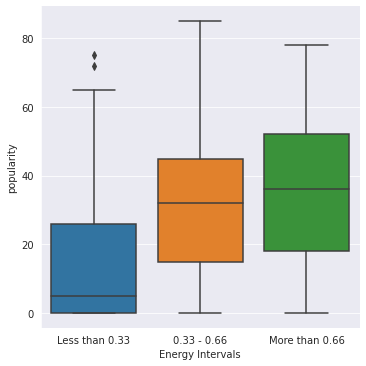

In [ ]:
sns.catplot(x="Energy Intervals", y="popularity", kind="box", data=sample_df)

The songs which have higher energy seem to have higher popularity. This situation will be examined in more detail with the hypothesis test.

###Comparing Popularity of Songs according to Different Features 

Here, three different boxplots have been plotted to see which of the different features can have more impact on popularity.

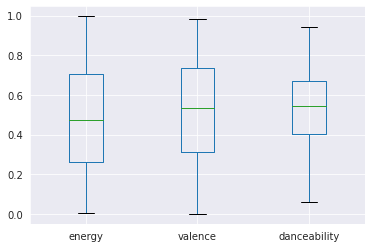

In [ ]:
df_part2 = df_part2.set_index("popularity")
bp = sample_df.boxplot(column=["energy","valence","danceability"])
bp

The means are close to each other, so it may be said that there is no feature that effects popularity significantly. 

##Hypothesis Testing 

###Null Hypothesis and Alternative Hypothesis

The aim in here is to examine whether the energy values of the songs have an impact on their popularity.

**Null Hypothesis ($\large{H_0}$)**: 
The energy values of the songs do not play a role in the popularity of the songs.

**Alternative Hypothesis ($\large{H_A}$)**: The energy values of the songs play a role in the popularity of the songs.

A new dataframe which includes the songs having energy values higher than 0.66 is created for comparing popularity of the songs. 



###Plotting and Calculations

In [ ]:
df_high = sample_df.loc[sample_df["Energy Intervals"]=="More than 0.66", :]
df_high.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,Energy Intervals
107213,0.040500,['Descendents'],0.524,111200,0.990,0,2BY2O9OybmxpND0DqNgx97,0.000000,9,0.226,-4.009,0,'Merican,51,2004-03-23,0.1100,100.653,0.370,2004,More than 0.66
71959,0.064700,['Brooks & Dunn'],0.573,195107,0.847,0,07VwAUiHy0WXUZ8OLunzA4,0.000082,6,0.383,-7.251,1,Honky Tonk Truth,43,1997-09-16,0.0341,153.971,0.795,1997,More than 0.66
17335,0.000892,['The Dandy Warhols'],0.558,211227,0.932,0,6ytyCjQqiQBahvYpsGiNKV,0.677000,2,0.152,-5.730,1,Bohemian Like You,17,2010-01-01,0.0389,131.497,0.531,2010,More than 0.66
107027,0.001860,['One Slack Mind'],0.611,292187,0.751,1,4iI0mSklhpFo2oXKRzK777,0.000410,11,0.201,-7.763,1,Backstroke,0,2017-06-01,0.0756,129.467,0.684,2017,More than 0.66
173063,0.120000,"['Shovels & Rope', 'Shakey Graves']",0.587,268667,0.731,0,6INaSJ4clfZ8pvXSGZQnJ7,0.000006,7,0.132,-5.632,1,Unknown Legend,55,2015-11-20,0.0398,110.936,0.539,2015,More than 0.66


At this part, mean and standard deviation of the dataframe and sample mean are displayed.

In [ ]:
df_part2 = df_part2.reset_index()
popularity_mean = df_part2["popularity"].mean()
popularity_std = df_part2["popularity"].std()
sample_mean_energetic_songs = df_high["popularity"].mean()
print("mean:", popularity_mean)
print("standard deviation:", popularity_std)
print("sample mean:", sample_mean_energetic_songs)

mean: 25.693380889849703
standard deviation: 21.87273982694497
sample mean: 33.876666666666665


The normal distribution and the location of the sample mean on that distribution is displayed.

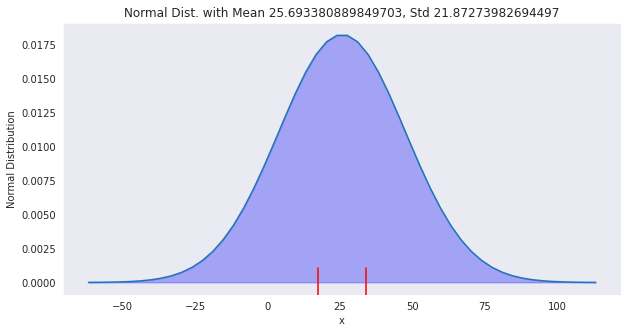

In [ ]:
#Important Note: I took this code from recitation materials and modified it.

#mean and std values from the sample
offset = 4*popularity_std

# calculating the z-score
z_score = (sample_mean_energetic_songs - popularity_mean) / popularity_std

# the x-axis ticks of the plot
# generates 100 equally separated ticks
x = np.linspace(popularity_mean - offset, popularity_mean + offset)

# probability density function
# of the given normal dist.
y = stats.norm.pdf(x,popularity_mean,popularity_std)

plt.figure(figsize=(10, 5))
plt.plot(x,y)
# put grids on the figure
plt.grid()
plt.xlabel('x')
plt.ylabel('Normal Distribution')
plt.fill_between(x, y, alpha=0.3, color='b')
# display the z-score locations
plt.axvline(popularity_mean - z_score*popularity_std, ymax=0.1, color="red")
plt.axvline(popularity_mean + z_score*popularity_std, ymax=0.1, color="red")
# annotate the sample mean

plt.title('Normal Dist. with Mean {}, Std {}'.format(popularity_mean, popularity_std))
plt.show()

Z-score is calculated to find out how many standard deviations away our sample mean is.

In [ ]:
print(z_score)

0.3741317201942847


The probability value corresponding to 0.37 in the z table is 0.6443. 

In [ ]:
probabilty_val = 0.6443
p_value = 1-2*(probabilty_val-0.5)
print(p_value)

0.7114


###Outcome of Hypothesis Test

> p-value is higher than significance value, so we fail to reject the null hypothesis.

> When the songs having energy values higher than 0.66 were accepted as energetic songs and the significance value was taken as 0.05, the hypothesis could not be proven.

> Results may change according to the determined threshold value for the songs to be counted as energetic.



#PART 3

In [ ]:
filename = "data.csv"
df_part3 = pd.read_csv(join(path_prefix, filename))
df_part3.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


##Organizing Data to Apply Machine Learning Algorithms

Since there are so many features in our dataset, only energy, danceability and valence features will be used.

In [ ]:
df_part3 = df_part3.drop(["acousticness","duration_ms","explicit","id","explicit","instrumentalness","key","liveness","loudness","mode","release_date","speechiness","tempo","year"],axis=1)
df_part3.head()

,artists,danceability,energy,name,popularity,valence
0,['Mamie Smith'],0.598,0.224,Keep A Song In Your Soul,12,0.6340
1,"[""Screamin' Jay Hawkins""]",0.852,0.517,I Put A Spell On You,7,0.9500
2,['Mamie Smith'],0.647,0.186,Golfing Papa,4,0.6890
3,['Oscar Velazquez'],0.730,0.798,True House Music - Xavier Santos & Carlos Gomi...,17,0.0422
4,['Mixe'],0.704,0.707,Xuniverxe,2,0.2990


Songs with a popularity value over 25 will be assumed as popular. The following function will be used for encoding. In other words, it will turn the categorical data (songs being popular or not) to numerical data (0 or 1).

In [ ]:
def categorize_popularity(feature_value):
  if feature_value < 25:
    return 0
  else:
    return 1

In [ ]:
df_part3['categorical_popularity'] = df_part3["popularity"].astype(int).apply(categorize_popularity)
df_part3.head()

,artists,danceability,energy,name,popularity,valence,categorical_popularity
0,['Mamie Smith'],0.598,0.224,Keep A Song In Your Soul,12,0.6340,0
1,"[""Screamin' Jay Hawkins""]",0.852,0.517,I Put A Spell On You,7,0.9500,0
2,['Mamie Smith'],0.647,0.186,Golfing Papa,4,0.6890,0
3,['Oscar Velazquez'],0.730,0.798,True House Music - Xavier Santos & Carlos Gomi...,17,0.0422,0
4,['Mixe'],0.704,0.707,Xuniverxe,2,0.2990,0


In [ ]:
feature_columns = ["danceability","energy","valence"]
X = df_part3[feature_columns]
y = df_part3["categorical_popularity"]

##Forming Decision Tree

Splitting data --> 80% for training, 10% for validation, 10% for testing

In [ ]:
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, random_state=0, test_size=0.20)
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, random_state=0, test_size=0.50)

Creating model with max_depth=3 to visualize the decision tree clearly.

In [ ]:
model = DecisionTreeClassifier(max_depth=3, criterion="entropy")
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
print(export_text(model, feature_names=list(X.columns)))

|--- energy <= 0.35
|   |--- valence <= 0.49
|   |   |--- energy <= 0.26
|   |   |   |--- class: 0
|   |   |--- energy >  0.26
|   |   |   |--- class: 0
|   |--- valence >  0.49
|   |   |--- energy <= 0.26
|   |   |   |--- class: 0
|   |   |--- energy >  0.26
|   |   |   |--- class: 0
|--- energy >  0.35
|   |--- energy <= 0.48
|   |   |--- valence <= 0.50
|   |   |   |--- class: 1
|   |   |--- valence >  0.50
|   |   |   |--- class: 0
|   |--- energy >  0.48
|   |   |--- valence <= 0.18
|   |   |   |--- class: 0
|   |   |--- valence >  0.18
|   |   |   |--- class: 1



Visualizing Decision Tree

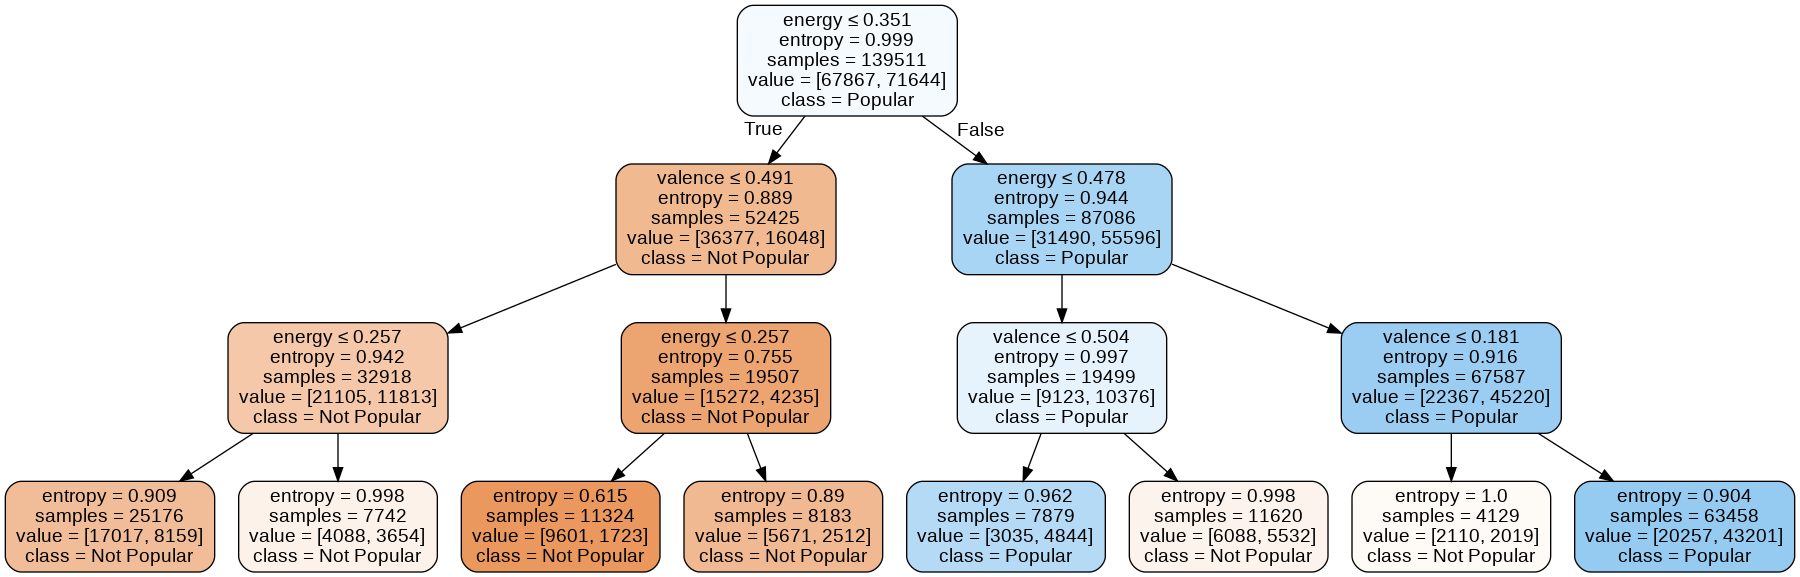

In [ ]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = X.columns.values,class_names=["Not Popular", "Popular"])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('popularity.png')
Image(graph.create_png())

Value variable represents how many popular and unpopular songs exist in the particular node (value = [number of not popular songs,number of popular songs]).

##Hyperparameter Tuning - Visualizing Accuracy Scores with Different max_depth Values

In [ ]:
#this code is taken exactly from recitation materials except the max_depth range
train_set_accuracies = []
val_set_accuracies = []

for i in range(1,30):
  model_temp = DecisionTreeClassifier(criterion="entropy", max_depth=i)
  model_temp.fit(X_train, y_train)
  train_preds = model_temp.predict(X_train)
  val_preds = model_temp.predict(X_val)
  train_set_accuracies.append(accuracy_score(y_train, train_preds))
  val_set_accuracies.append(accuracy_score(y_val, val_preds))

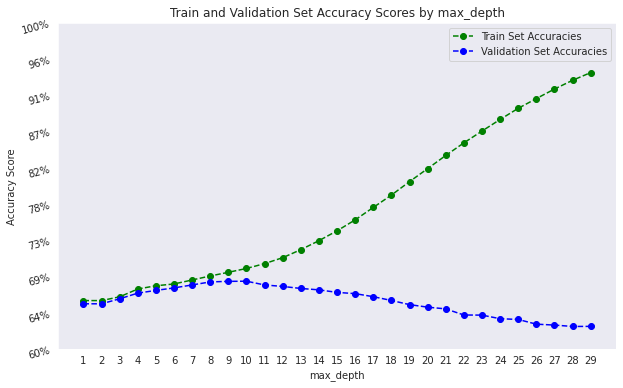

In [ ]:
#this code is taken  exactly from recitation materials except the max_depth range
fig, ax = plt.subplots(figsize = (10, 6))

# the label/tick locations
x_ticks = np.arange(len(range(1,30)))
# yloc between 0.6-1
y_ticks = np.linspace(.6, 1.0, 10)
y_labels = [f"{val*100:.0f}%" for val in y_ticks]

ax.plot(train_set_accuracies, "go--", label = "Train Set Accuracies")
ax.plot(val_set_accuracies, "bo--", label = "Validation Set Accuracies")

ax.set_ylabel("Accuracy Score")
ax.set_xlabel("max_depth")
ax.set_title("Train and Validation Set Accuracy Scores by max_depth")
ax.set_xticks(x_ticks)
ax.set_xticklabels(range(1,30))
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)
ax.legend()

plt.yticks(rotation = 15)
plt.grid()
plt.show()

Train set accuracy scores increases continuously because of overfitting. The max_depth value with the highest accuracy score according to validation score will be the optimal hyperparameter. In this case, it is 9 and it will also be checked with GridSearchCV.

##GridSearchCV

In [ ]:
parameter_dict = {"criterion" : ["gini","entropy"], "max_depth" : range(1,30)}
dtree_gscv = GridSearchCV(model, param_grid=parameter_dict)
dtree_gscv.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='entropy', max_depth=3,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                

In [ ]:
dtree_gscv.best_params_

{'criterion': 'entropy', 'max_depth': 9}

As expected, it is 9 again. Also, let's compare the accuracy scores of max_depth = 9 and max_depth = 3 (the one we chose for modeling)

In [ ]:
dtree_gscv = DecisionTreeClassifier(max_depth=9, criterion="entropy")
dtree_gscv.fit(X_train, y_train)

pred_md3 = model.predict(X_test)
pred_md9 = dtree_gscv.predict(X_test)
print("Accuracy for max_depth = 3:",metrics.accuracy_score(y_test, pred_md3))
print("Accuracy for max_depth = 9:",metrics.accuracy_score(y_test, pred_md9))

Accuracy for max_depth = 3: 0.6658638683410746
Accuracy for max_depth = 9: 0.6873673949194334


As expected, accuracy for max_depth = 9 is higher.

##Forming Random Forest

Same training, test and validation datas are used for random forest.

In [ ]:
model_rf = RandomForestClassifier(n_estimators=100, max_depth=3)
model_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Hyperparameter tuning will be done again but for random forest this time. However, the range for max_depth has reduced for code efficiency.

In [ ]:
param_grid = { 
    "max_depth" : range(3,10)
}

In [ ]:
rf_gscv = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv= 5)
rf_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_s

In [ ]:
rf_gscv.best_params_

{'max_depth': 9}

In [ ]:
rf_best =RandomForestClassifier(n_estimators= 100, max_depth=9)
rf_best.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In below, accuracy score for optimal max_depth value for random forest modeling is displayed

In [ ]:
pred_rf =rf_best.predict(X_test)
print("Accuracy for random forest with max_depth = 9:",metrics.accuracy_score(y_test, pred_rf))

Accuracy for random forest with max_depth = 9: 0.6902918745340902
